# Problem Set #15

**Tc2037 Implementation of Computational Methods**

May 24, 2021.

_Authors of this notebook’s solution:_

- _Student ID and Name:_
- _Student ID and Name:_

In [1]:
;; External function required for this notebook.
(require '[clojure.test :refer [is]])

nil

## Context-Free Grammars (CFG)

A _formal grammar_ is a set of rules that are used to generate and identify patterns of strings in a language.

_Context-Free Grammars_ (CFGs) are used to describe _context-free languages_. A CFG can describe all regular languages and more, but they cannot describe all possible languages. A _regular language_ is a language that can be expressed with a regular expression or a DFA/NFA.

CFGs are studied in fields of theoretical computer science, compiler design, and linguistics. They are used to describe programming languages and parser programs in compilers can be generated automatically from CFGs.

Formally, a CFG $G$ is defined by the 4-tuple $G = (V,\Sigma ,R,S)$, where:

* $V$ is a set of nonterminal symbols (or variables). These are the symbols that will always appear on the left-hand side of the production rules, though they can be included on the right-hand side. 
* $\Sigma$ is a set of terminal symbols $(\Sigma \cap V = \emptyset)$ which are the characters that appear in the language/strings generated by the grammar. Terminal symbols never appear on the left-hand side of the production rule and are always on the right-hand side.
* $R$ is a set of production rules where each production rule maps a variable to a string $s \in (V \cup \Sigma)^*$.
* $S$ is a start symbol $(S \in V)$ which is a special nonterminal symbol that is used to represent the whole sentence (or program).

### Deriving a String from a CFG

Follow these steps:

* Begin the string with a start symbol.
* Apply one of the production rules to the start symbol on the left-hand side by replacing the start symbol with the right-hand side of the production.
* Repeat the process of selecting nonterminal symbols in the string, and replacing them with the right-hand side of some corresponding production, until all nonterminals have been replaced by terminal symbols. Note, it could be that not all production rules are used.

[[source](https://brilliant.org/wiki/context-free-grammars/#:~:text=A%20context%2Dfree%20grammar%20is,%2C%20compiler%20design%2C%20and%20linguistics)]

### CFG Example

We want a CFG that generates the language $\{ a^n b^n : n \ge 0 \}$. In other words, we want to accept strings that contain a sequence of symbols `a` followed by the exact same number of  symbols `b`.

The formal definition of the CFG that solves this problem is as follows:

* $V = \{ A \}$
* $\Sigma = \{ a, b \}$
* $R$ (production rules):
  1. $A \to aAb$
  2. $A \to \varepsilon$
* $S = A$

**NOTE:** The above production rules can also be written as: $A \to aAb \; | \; \varepsilon$

Let’s now verify the following _derivation_: $S \stackrel{*}{\Rightarrow} aaabbb$

$$
\begin{align*}
S &\Rightarrow \underline{ A } & \\ 
 &\Rightarrow a \underline{ A } b & (\textrm{result of applying rule 1}) \\ 
 &\Rightarrow a a \underline{ A } b b & (\textrm{result of applying rule 1}) \\ 
 &\Rightarrow a a a \underline{ A } b b b & (\textrm{result of applying rule 1}) \\ 
 &\Rightarrow a a a \varepsilon b b b & (\textrm{result of applying rule 2}) \\ 
 &\Rightarrow a a a b b b &  \\ 
\end{align*}
$$

The following _derivation tree_ is an alternative way of generating the desired string:

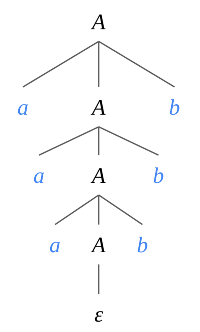

## Instaparse: A Parse Generator

In Clojure, we can use the [Instaparse](https://github.com/Engelberg/instaparse) package to create a parser from a CFG.

First, we must import the required dependencies and define some auxilary functions:

In [2]:
(require '[cemerick.pomegranate :refer [add-dependencies]])
(add-dependencies :coordinates '[[instaparse "1.4.10"]]
                  :repositories {"clojars" "https://clojars.org/repo"})
(require '[instaparse.core :refer [parser]])

(defn fails? [r] (instance? instaparse.gll.Failure r))
(defn succeeds? [r] (not (fails? r)))

#'user/succeeds?

Given a grammar, turning it into an executable parser is as simple as typing the grammar. Using the grammar from the previous example:

In [3]:
(def example (parser "
  A =   'a' A 'b'
      | epsilon
"))

#'user/example

To inspect the grammar, just evaluate the corresponding parser object:

In [4]:
example

A = "a" A "b" | ε


The parser object is a function that returns the corresponding derivation tree when appplied with an input string as argument:

In [5]:
(example "aaabbb")

[:A "a" [:A "a" [:A "a" [:A] "b"] "b"] "b"]

If the provided string is not syntactically correct it returns an `instaparse.gll.Failure` object that shows the corresponding error message when displayed:

In [6]:
(example "aaabb")

Parse error at line 1, column 6:
aaabb
     ^
Expected:
"b" (followed by end-of-string)


## Problems

**Instructions:** For each of the following problems:

* Design and write the formal definition of the context-free grammar that generates the described language.
* Code a parser using _instaparse_ and make sure it passes all the unit tests.

### Problem 1

$\{w \; w^R : w \in \{ 0, 1 \}^* \}$. **NOTE:** $w^R$ is the reverse of $w$. This language accepts a possibly empty sequence of zeros and ones that happens to be a [palindrome](https://en.wikipedia.org/wiki/Palindrome).

In [7]:
(def palindrome (parser ""))

#'user/palindrome

In [8]:
;;; Unit tests:
(is (succeeds? (palindrome "")))
(is (succeeds? (palindrome "0")))
(is (succeeds? (palindrome "1")))
(is (succeeds? (palindrome "11")))
(is (succeeds? (palindrome "00")))
(is (succeeds? (palindrome "010")))
(is (succeeds? (palindrome "1111111")))
(is (succeeds? (palindrome "000010000")))
(is (succeeds? (palindrome "01001110101110010")))
(is (fails? (palindrome "01")))
(is (fails? (palindrome "10")))
(is (fails? (palindrome "1010")))
(is (fails? (palindrome "10000000")))
(is (fails? (palindrome "00010001")))
(is (fails? (palindrome "1010011010")))
(is (fails? (palindrome "111111111111111111110")))

true

### Problem 2

$\{x^{2n}y^n : n \ge 1 \}$. This language accepts a nonempty sequence of consecutive symbols `x` followed by a nonempty sequence of consecutive symbols `y`. The number of symbols `x` has to be exactly twice the number of symbols `y`.

In [9]:
(def twice (parser ""))

#'user/twice

In [10]:
;;; Unit tests:
(is (succeeds? (twice "xxy")))
(is (succeeds? (twice "xxxxyy")))
(is (succeeds? (twice "xxxxxxxxyyyy")))
(is (succeeds? (twice "xxxxxxxxxxxxxxxxxxxxyyyyyyyyyy")))
(is (fails? (twice "")))
(is (fails? (twice "xy")))
(is (fails? (twice "yxx")))
(is (fails? (twice "xyy")))
(is (fails? (twice "xxxyyy")))
(is (fails? (twice "xyyxyy")))
(is (fails? (twice "xxxxyyx")))
(is (fails? (twice "yyyxxxxxx")))
(is (fails? (twice "xxxxxxxxxxyy")))
(is (fails? (twice "xyxyxyxyxxxx")))
(is (fails? (twice "xxxxxxxxxxyyyy")))

true

### Problem 3

$\{ a^i b^j c^k : i, j, k \ge 0 \textrm{ and } i + j = k \}$. This language accepts a possibly empty sequence of consecutive symbols `a` followed by a possible empty sequence of consecutive symbols `b` followed by a possible empty sequence of consecutive symbols `c`. The number of symbols `c` has to be exactly the number symbols `a` plus the number symbols `b`.

In [11]:
(def a-plus-b-equals-c (parser ""))

#'user/a-plus-b-equals-c

In [12]:
;;; Unit tests:
(is (succeeds? (a-plus-b-equals-c "")))
(is (succeeds? (a-plus-b-equals-c "abcc")))
(is (succeeds? (a-plus-b-equals-c "ac")))
(is (succeeds? (a-plus-b-equals-c "bc")))
(is (succeeds? (a-plus-b-equals-c "aaaaabbbcccccccc")))
(is (succeeds? (a-plus-b-equals-c "aaaaaaaaabcccccccccc")))
(is (succeeds? (a-plus-b-equals-c "bbbbbbbbbbbbbccccccccccccc")))
(is (succeeds? (a-plus-b-equals-c "abbbbbbbbbbbbccccccccccccc")))
(is (succeeds? (a-plus-b-equals-c "aaaabbbbbbbbbbbccccccccccccccc")))
(is (fails? (a-plus-b-equals-c "a")))
(is (fails? (a-plus-b-equals-c "b")))
(is (fails? (a-plus-b-equals-c "c")))
(is (fails? (a-plus-b-equals-c "ab")))
(is (fails? (a-plus-b-equals-c "abc")))
(is (fails? (a-plus-b-equals-c "abbcc")))
(is (fails? (a-plus-b-equals-c "cccccc")))
(is (fails? (a-plus-b-equals-c "ccccaabb")))
(is (fails? (a-plus-b-equals-c "aaaaaaaa")))
(is (fails? (a-plus-b-equals-c "bbbbbbbbb")))
(is (fails? (a-plus-b-equals-c "aaaaaabbbbbb")))
(is (fails? (a-plus-b-equals-c "aabbcccccccccccccccccc")))

true